# EDA-Stackoverflow

In [1]:
#data structures
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import string
import json

# html
import requests 
import requests_cache
from bs4 import BeautifulSoup

# visualization
import matplotlib as mpl
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
import statistics

# text processing
import nltk
from textblob import TextBlob
from nltk import corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

# other
import time
import pprint as pp
import operator
import progressbar
import itertools
from time import sleep
import datetime
import calendar
from collections import Counter, defaultdict

from pprint import pprint
from math import isnan

In [2]:
# setup
plt.style.use('ggplot')

In [3]:
#packages used by textblob
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("brown")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/esmondchu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/esmondchu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/esmondchu/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/esmondchu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/esmondchu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data

In [4]:
Posts = pd.read_csv('../../../160-Stackoverflow-Data/train_test/raw_query/Posts.csv', \
                    dtype = {'LastEditorDisplayName': str, 'Tags': str})
Comments = pd.read_csv('../../../160-Stackoverflow-Data/train_test/raw_query/Comments.csv')
Votes = pd.read_csv('../../../160-Stackoverflow-Data/train_test/raw_query/Votes.csv')

/Users/esmondchu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Timely Collaboration and Values

In [5]:
#date to timestamp
def date_ts(s):
    """ 
    param s: str - date
    returns: int - timestamp
    """
    date = datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S")
    st = calendar.timegm(date.utctimetuple())
    return(st)

In [6]:
#Answer posts
df_answers = Posts[Posts.PostTypeId == 2]

In [7]:
df_answers = df_answers.reset_index(drop=True)

In [8]:
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146606 entries, 0 to 146605
Data columns (total 22 columns):
Unnamed: 0               146606 non-null int64
Id                       146606 non-null int64
PostTypeId               146606 non-null int64
ParentId                 146606 non-null float64
AcceptedAnswerId         0 non-null float64
CreationDate             146606 non-null object
Score                    146606 non-null int64
ViewCount                0 non-null float64
Body                     146606 non-null object
OwnerUserId              145842 non-null float64
OwnerDisplayName         827 non-null object
LastEditorUserId         43052 non-null float64
LastEditorDisplayName    192 non-null object
LastEditDate             43225 non-null object
LastActivityDate         146606 non-null object
CommunityOwnedDate       211 non-null object
Title                    0 non-null object
Tags                     0 non-null object
AnswerCount              0 non-null float64
CommentCoun

In [9]:
df_answers.CreationDate = df_answers.CreationDate.str[:-4]

In [10]:
unix_ans = [date_ts(i) for i in df_answers.CreationDate]

In [11]:
df_answers_time = pd.DataFrame({'ParentID':df_answers.ParentId, 'Cr_time':unix_ans})

In [12]:
df_list = df_answers_time.groupby(df_answers_time.ParentID)

In [13]:
uni_par_id = list(df_answers_time.ParentID.unique())

In [15]:
ans_date = [list(df_list.get_group(i).Cr_time) for i in uni_par_id]

In [17]:
one = 0
two = 0
three = 0
fourplus = 0

for i in ans_date:
    if len(i) == 1:
        one += 1
    elif len(i) == 2:
        two += 1
    elif len(i) == 3:
        three += 1
    else:
        fourplus += 1
        
print(one, two, three, fourplus)

27311 19048 10086 9939


In [83]:
# #set 1-answer post sd to 0
# for i in ans_date:
#     if len(i) == 1:
#         i.append(i[0])
#     else:
#         i == i

In [20]:
#only count post with 3+ answers
ans_date_3plus = []
post_index = []
for i in ans_date:
    if len(i) >= 3:
        ans_date_3plus.append(i)
        post_index.append(ans_date.index(i))

In [21]:
import statistics
ans_time_sd = [statistics.stdev(i) for i in ans_date_3plus]

In [23]:
post_Id = [df_answers.ParentId.unique()[i] for i in post_index]

In [24]:
post_ans_sd = pd.DataFrame({'post_Id':post_Id, 'time_sd':ans_time_sd})

In [25]:
#Parents posts
Parents_post = Posts[Posts.PostTypeId == 1]

In [26]:
Parents_post = Parents_post.reset_index(drop=True)

In [27]:
Parents_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69312 entries, 0 to 69311
Data columns (total 22 columns):
Unnamed: 0               69312 non-null int64
Id                       69312 non-null int64
PostTypeId               69312 non-null int64
ParentId                 0 non-null float64
AcceptedAnswerId         46063 non-null float64
CreationDate             69312 non-null object
Score                    69312 non-null int64
ViewCount                69312 non-null float64
Body                     69312 non-null object
OwnerUserId              68499 non-null float64
OwnerDisplayName         866 non-null object
LastEditorUserId         41821 non-null float64
LastEditorDisplayName    488 non-null object
LastEditDate             42248 non-null object
LastActivityDate         69312 non-null object
CommunityOwnedDate       24 non-null object
Title                    69312 non-null object
Tags                     69312 non-null object
AnswerCount              69312 non-null float64
Comment

In [28]:
df_parents = pd.DataFrame({'post_Id':Parents_post.Id, 'Views_count':Parents_post.ViewCount,\
                           'Score':Parents_post.Score, 'Comment_count':Parents_post.CommentCount})

In [29]:
df_comb = df_parents.join(post_ans_sd.set_index('post_Id'), on='post_Id')

In [30]:
df_comb = df_comb.dropna()
df_comb = df_comb.reset_index(drop=True)

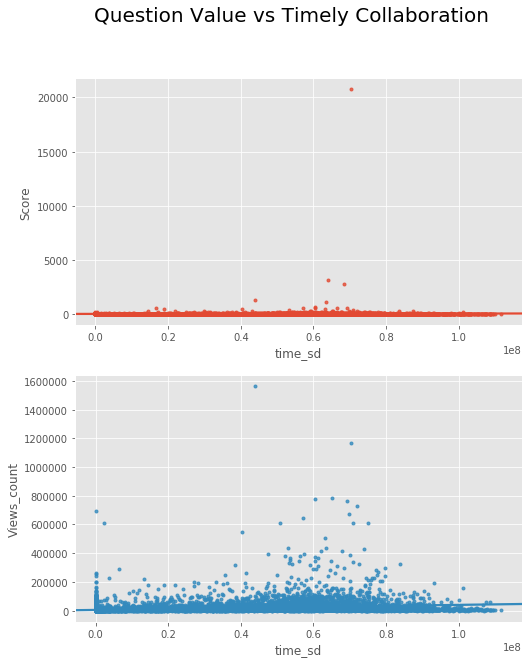

In [31]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, df_comb.Score, marker=".", ax=ax1)
sns.regplot(df_comb.time_sd, df_comb.Views_count, marker=".", ax=ax2)
plt.show()

## How many questions are left unanswered?

In [34]:
n_questions = len(Posts.loc[Posts.PostTypeId == 1])
n_unanswered = len(Posts.loc[(Posts.PostTypeId == 1) & (Posts.AcceptedAnswerId.isnull())])
print(f'Approximately {n_unanswered/n_questions*100}% of questions remain with nonaccepted answers.')

Approximately 33.5425323176362% of questions remain with nonaccepted answers.


In [35]:
# in what context does only 28% of questions get answered?
Posts.CreationDate = pd.to_datetime(Posts.CreationDate, format="%Y-%m-%dT%H:%M:%S")
Posts_sorted = Posts.sort_values(by=['CreationDate'])
earliest_date = Posts_sorted.iloc[0]['CreationDate']
latest_date = Posts_sorted.iloc[-1]['CreationDate']

print(f'In the context of our sample, the earliest post was {earliest_date} and the latest post was {latest_date}.')
print('Which suggests that within a 3 month timespan only a quarter of posted questions get answered.')

In the context of our sample, the earliest post was 2012-01-01 00:24:23.940000 and the latest post was 2018-03-10 09:54:48.353000.
Which suggests that within a 3 month timespan only a quarter of posted questions get answered.


In [37]:
# how many questions get absolutely no answers?
# there should only ever be a unique post id per question
n_questions = len(Posts.loc[Posts.PostTypeId == 1])

# to obtain the number of answers, we count the number of unique parent ids,
n_answers = len(set(Posts.loc[(Posts.PostTypeId == 2)].ParentId.values))
print(f'Approximately {(1 - (n_answers/n_questions))*100}% of questions remain unanswered.')

Approximately 4.224376731301938% of questions remain unanswered.


## What is the ratio of questions without an accepted answer?

In [38]:
QUESTION = 1
ANSWER = 2
UP = 2
DOWN = 3

In [40]:
Posts['ParentID'] = Posts['ParentId'].fillna(0).astype(int)
Posts['AcceptedAnswerId'] = Posts['AcceptedAnswerId'].fillna(0).astype(int)

In [41]:
questions = Posts[Posts['PostTypeId'] == 1]
unanswered = questions[questions['AcceptedAnswerId'] == 0]

In [42]:
print('The ratio of questions without an accepted answer: ', len(unanswered) / len(questions))

The ratio of questions without an accepted answer:  0.335425323176362


## 15 most upvoted questions that are unanswered.

In [43]:
unanswered.rename(columns = {'Id':'PostId'}, inplace = True)
upvotes = Votes[Votes['VoteTypeId'] == UP]

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [44]:
no_ans_q = questions[questions['AnswerCount'] == 0]
no_ans_q.rename(columns = {'Id':'PostId'}, inplace = True)
uv_no_ans = upvotes.join(no_ans_q.set_index('PostId'), on='PostId', how='inner', lsuffix='_x')

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [45]:
top_uv_no_ans = Counter(uv_no_ans['PostId']).most_common(15)

In [46]:
unanswered.sort_values(by='Score',ascending=False)[:15]

,Unnamed: 0,PostId,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,CommunityOwnedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,ParentID
31622,31622,9881611,1,NaN,0,2012-03-27 00:04:39.663,673,374622.0,<p>I understand that JPA 2 is a specification ...,654203.0,...,2016-09-21T19:10:49.550,2018-02-20T05:20:00.390,NaN,What's the difference between JPA and Hibernate?,java hibernate jpa orm,23.0,4,247.0,NaN,0
26310,26310,9689793,1,NaN,0,2012-03-13 18:20:40.340,551,777012.0,"<p>I have installed an application, when I try...",923421.0,...,2018-03-06T02:08:05.520,2018-03-06T02:08:05.520,NaN,"Can't execute jar- file: ""no main manifest att...",java jar manifest main,31.0,5,117.0,NaN,0
11833,11833,9151619,1,NaN,0,2012-02-05 18:06:17.083,225,316939.0,<p>I use a JSON library called <code>JSONObjec...,1150116.0,...,2016-08-10T19:10:51.690,2018-03-07T06:17:05.170,NaN,How to iterate over a JSONObject?,java json,11.0,1,51.0,NaN,0
14706,14706,9261705,1,NaN,0,2012-02-13 13:52:37.310,199,28449.0,<p>I am aware that every object requires heap ...,632951.0,...,2012-02-13T16:25:14.500,2015-04-21T07:07:30.507,NaN,What happens when there's insufficient memory ...,java,11.0,7,37.0,NaN,0
51876,51876,10604298,1,NaN,0,2012-05-15 15:45:46.293,195,97712.0,<p>I understand that <code>@Component</code> a...,1396576.0,...,2013-09-02T12:51:18.513,2018-01-19T18:29:19.263,NaN,Spring: @Component versus @Bean,java spring annotations autowired,5.0,4,93.0,NaN,0
51331,51331,10585135,1,NaN,0,2012-05-14 14:17:49.337,128,612254.0,<blockquote>\r\r\n <p><strong>Possible Duplic...,1385563.0,...,2017-05-23T12:34:36.203,2014-10-27T15:48:01.430,NaN,"Eclipse reported ""Failed to load JNI shared li...",java eclipse jni,4.0,5,24.0,2012-07-22T21:53:19.990,0
4977,4977,8882097,1,NaN,0,2012-01-16 15:23:40.420,122,114196.0,<blockquote>\r\r\n <p><strong>Possible Duplic...,496949.0,...,2017-09-25T05:34:45.457,2017-09-25T05:34:45.457,NaN,How to calculate the intersection of two sets?,java set intersection hashset,2.0,0,19.0,2012-01-17T18:41:01.847,0
58515,58515,10850753,1,NaN,0,2012-06-01 12:57:30.123,119,187776.0,<pre><code>List&lt;String&gt; ids = new ArrayL...,1414799.0,...,2015-03-26T00:39:20.777,2018-02-17T16:33:05.413,NaN,How to convert a List<String> into a comma sep...,java list,13.0,5,28.0,2015-11-03T10:21:35.233,0
25201,25201,9652732,1,NaN,0,2012-03-11 05:33:51.967,118,467302.0,<p>I don't know how to find the length of an a...,1254044.0,...,2017-07-31T06:29:01.280,2017-07-31T06:29:01.280,NaN,How to find the length of an array list?,java arraylist,2.0,7,18.0,2014-07-04T01:07:18.450,0
29630,29630,9809074,1,NaN,0,2012-03-21 16:43:54.823,117,62608.0,"<p>I have read <a href=""https://community.orac...",NaN,...,2017-09-29T08:37:44.243,2017-10-28T11:53:00.997,NaN,Java: difference between strong/soft/weak/phan...,java reference,5.0,5,69.0,NaN,0


## What is the mean and median response for a question for each of the 20 most popular tags?

In [101]:
#need to upload later

## Edit

In [34]:
parents_time = Parents_post.CreationDate.str[:-4]

In [35]:
unix_parents = [date_ts(i) for i in parents_time]

In [36]:
df_parents_time = pd.DataFrame({'Cr_time_parents':unix_parents, 'ParentID':Parents_post.Id})

In [38]:
df_parents_time.head()

,Cr_time_parents,ParentID
0,1325377463,8691225
1,1325378153,8691261
2,1325378380,8691270
3,1325380742,8691389
4,1325381837,8691436


In [39]:
# Merge Table and Create Columns of Mins and Hours
df_compare = pd.merge(df_parents_time, df_answers_time, on='ParentID')

In [40]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time
0,1325377463,8691225,1325379784
1,1325377463,8691225,1325384707
2,1325377463,8691225,1328417842
3,1325378153,8691261,1325392496
4,1325378380,8691270,1325379617


In [41]:
df_compare['Duration'] = df_compare.Cr_time - df_compare.Cr_time_parents

In [42]:
df_compare['Duration_mins'] = df_compare.Duration/60
df_compare['Duration_hours'] = df_compare.Duration_mins/60

In [59]:
df_compare

,Cr_time_parents,ParentID,Cr_time,Duration,Duration_mins,Duration_hours
0,1325377463,8691225,1325379784,2321,3.868333e+01,0.644722
1,1325377463,8691225,1325384707,7244,1.207333e+02,2.012222
2,1325377463,8691225,1328417842,3040379,5.067298e+04,844.549722
3,1325378153,8691261,1325392496,14343,2.390500e+02,3.984167
4,1325378380,8691270,1325379617,1237,2.061667e+01,0.343611
5,1325380742,8691389,1325395515,14773,2.462167e+02,4.103611
6,1325381837,8691436,1325382091,254,4.233333e+00,0.070556
7,1325381837,8691436,1325382123,286,4.766667e+00,0.079444
8,1325382256,8691456,1325383659,1403,2.338333e+01,0.389722
9,1325382973,8691474,1325402729,19756,3.292667e+02,5.487778


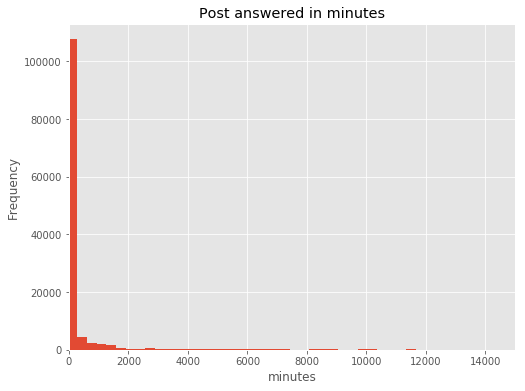

In [52]:
#Histogram
df_compare.Duration_mins.plot(kind = 'hist', bins=10000, figsize=(8,6))
plt.xlim(0,15000)
plt.xlabel('minutes')
plt.title('Post answered in minutes')
#plt.grid()
plt.show()

In [45]:
df_compare.Duration_mins.describe()

count    1.466060e+05
mean     1.614120e+05
std      5.208497e+05
min     -2.965783e+03
25%      6.633333e+00
50%      2.075000e+01
75%      4.209500e+02
max      3.246212e+06
Name: Duration_mins, dtype: float64

## Probability of a question being answered as a function of time in minutes

In [47]:
#Parents Post Data Wrangling
parents_time = Parents_post.CreationDate.str[:-4]

In [48]:
unix_parents = [date_ts(i) for i in parents_time]

In [49]:
df_parents_time = pd.DataFrame({'Cr_time_parents':unix_parents, 'ParentID':Parents_post.Id})

In [50]:
#Merge Table & Create Columns of mins and hours¶
df_compare = pd.merge(df_parents_time, df_answers_time, on='ParentID')

In [51]:
df_compare['Duration'] = df_compare.Cr_time - df_compare.Cr_time_parents

In [52]:
df_compare['Duration_mins'] = df_compare.Duration/60

In [56]:
df_compare.Duration_mins.head()

0       38.683333
1      120.733333
2    50672.983333
3      239.050000
4       20.616667
Name: Duration_mins, dtype: float64

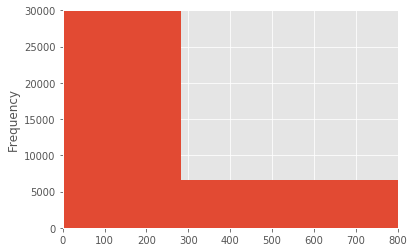

In [66]:
df_compare.Duration_mins.plot(kind = 'hist', bins = 5000)
plt.xlim(0,800)
plt.ylim(0,30000)
plt.show()

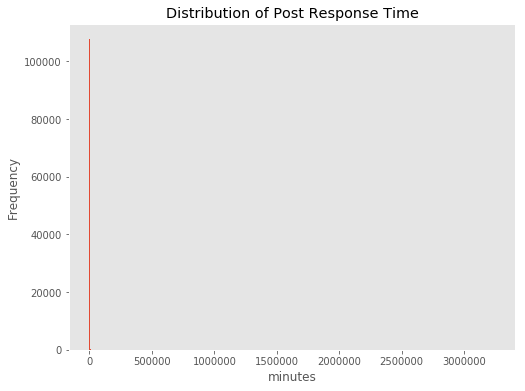

In [58]:
#Histogram
df_compare.Duration_mins.plot(kind = 'hist', bins=5000, figsize=(8,6))
#plt.xlim(0,800)
plt.xlabel('minutes')
# plt.axvline(x=35.8)
plt.title('Distribution of Post Response Time')
plt.grid()
plt.show()

In [67]:
df_compare.Duration_mins.describe()

count    1.466060e+05
mean     1.614120e+05
std      5.208497e+05
min     -2.965783e+03
25%      6.633333e+00
50%      2.075000e+01
75%      4.209500e+02
max      3.246212e+06
Name: Duration_mins, dtype: float64

In [42]:
#Calculate Frequency and Probability of mins

In [43]:
Duration_mins_rounded = df_compare.Duration_mins.round()

In [44]:
fre_mins = pd.DataFrame(Duration_mins_rounded.value_counts(), index=None)
fre_mins['mins'] = fre_mins.index
fre_mins = fre_mins.rename(columns={'Duration_mins':'Frequency','mins':'mins'})
fre_mins.reset_index(inplace=True, drop=True)
fre_mins = fre_mins.sort_values('mins')

In [46]:
fre_mins['Probabiity'] = fre_mins.Frequency/sum(fre_mins.Frequency)

In [48]:
fre_mins.Probabiity.describe()

count    7470.000000
mean        0.000134
std         0.001140
min         0.000008
25%         0.000008
50%         0.000016
75%         0.000033
max         0.029600
Name: Probabiity, dtype: float64

In [49]:
#Cumulative Probability
fre_mins['cum_pro'] = np.cumsum(list(fre_mins.Probabiity))

Text(0.5,1,'cumulative probability')

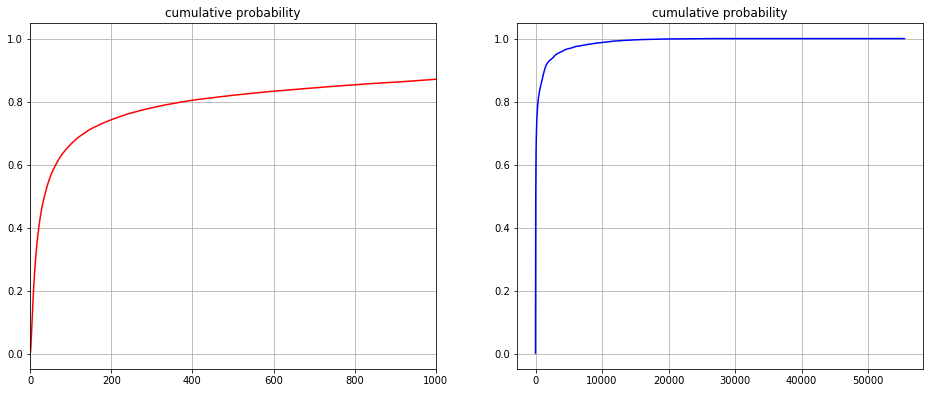

In [51]:
fig=plt.figure(figsize=(16,14))
plt.subplot(221)
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='red')
plt.xlim(0,1000)
plt.grid()
plt.title('cumulative probability')
plt.subplot(222)
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='blue')
plt.grid()
plt.title('cumulative probability')

## Avg Response Time Per Tag

In [44]:
Posts = Posts.loc[(Posts.PostTypeId == 1) | (Posts.PostTypeId == 2)]
Posts = Posts[(Posts.PostTypeId == 2) | ((Posts.PostTypeId == 1) & (len(Posts.Tags) > 0))]

# prepare data in better format
Posts.CreationDate = pd.to_datetime(Posts.CreationDate, format="%Y-%m-%dT%H:%M:%S")
Posts.head(3)

,Unnamed: 0,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
0,0,8691225,1,NaN,9147026.0,2012-01-01 00:24:23.940,3,1086.0,<p>My program is a game that uses RMI to allow...,984325.0,...,NaN,2012-01-01T00:28:01.457,2014-12-07T08:58:58.820,NaN,Set up my server to allow remote users to conn...,java dns ip-address rmi,3.0,7,NaN,NaN
1,1,8691261,1,NaN,8691856.0,2012-01-01 00:35:53.203,1,895.0,<p>I would like a shortened name for the icon ...,1024677.0,...,NaN,NaN,2012-01-01T04:34:56.693,NaN,How do I differ the shortcut name of my app fr...,java android icons shortcut,1.0,1,NaN,NaN
2,2,8691270,1,NaN,8691334.0,2012-01-01 00:39:40.540,4,7886.0,<p>I'd love to get a demonstration of how to m...,891814.0,...,NaN,2014-04-07T00:33:25.707,2014-04-07T00:33:25.707,NaN,"using Glue on GUI, java",java swing,1.0,6,NaN,NaN


In [45]:
# if the parentID is empty, have it point to itself, this will simplify the query
def circulate_parentID(row):
    return row.Id if isnan(row.ParentId) else row.ParentId
        
Posts.ParentId = Posts.apply(circulate_parentID, axis=1)
Posts.ParentId = Posts.ParentId.astype('int64')
Posts.head(3)

,Unnamed: 0,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
0,0,8691225,1,8691225,9147026.0,2012-01-01 00:24:23.940,3,1086.0,<p>My program is a game that uses RMI to allow...,984325.0,...,NaN,2012-01-01T00:28:01.457,2014-12-07T08:58:58.820,NaN,Set up my server to allow remote users to conn...,java dns ip-address rmi,3.0,7,NaN,NaN
1,1,8691261,1,8691261,8691856.0,2012-01-01 00:35:53.203,1,895.0,<p>I would like a shortened name for the icon ...,1024677.0,...,NaN,NaN,2012-01-01T04:34:56.693,NaN,How do I differ the shortcut name of my app fr...,java android icons shortcut,1.0,1,NaN,NaN
2,2,8691270,1,8691270,8691334.0,2012-01-01 00:39:40.540,4,7886.0,<p>I'd love to get a demonstration of how to m...,891814.0,...,NaN,2014-04-07T00:33:25.707,2014-04-07T00:33:25.707,NaN,"using Glue on GUI, java",java swing,1.0,6,NaN,NaN


In [47]:
tag_response_times = defaultdict(list)
def map_response_times(df):
    # sort by creation date to get question and then answer
    df = df.sort_values(by=['CreationDate']).head(2)
    response_times = df['CreationDate'].values
    # convert the response time to minutes
    response_time = (response_times[1] - response_times[0]).astype('timedelta64[m]').astype(int)
    # map each tag with appropriate response time
    try:
        for tag in df['Tags'].values[0].split():
            tag_response_times[tag].append(response_time)
    except AttributeError:
        continue
        
    
# query - group by the parent id then sort by creation date
#         the first data must be the question (posttypeid == 1)
#         and the second musst be the answer (if at all existent) (posttypeid == 2)
tag_list_by_time = Posts.groupby('ParentId')
bar = progressbar.ProgressBar()
for key, group in bar(tag_list_by_time):
    if group.shape[0] >= 2:
        map_response_times(group)

100% (69312 of 69312) |###################| Elapsed Time: 0:01:17 Time: 0:01:17
 15% (10973 of 69312) |###                | Elapsed Time: 0:00:11 ETA:  0:00:51

89871     NaN
10837    java
Name: Tags, dtype: object


 18% (12596 of 69312) |###                | Elapsed Time: 0:00:13 ETA:  0:00:50

92872    NaN
92886    NaN
Name: Tags, dtype: object


 64% (44995 of 69312) |############       | Elapsed Time: 0:00:45 ETA:  0:00:25

151424                  NaN
44895     java netbeans sms
Name: Tags, dtype: object


 66% (46077 of 69312) |############       | Elapsed Time: 0:00:46 ETA:  0:00:26

153317    NaN
153328    NaN
Name: Tags, dtype: object


100% (69312 of 69312) |###################| Elapsed Time: 0:01:09 Time: 0:01:09


In [48]:
top_10_tags_response = sorted(tag_response_times.items(), key=lambda x: -len(x[1]))[0:10]
top_10_tags = [key for key, _ in top_10_tags_response]
top_10_tags

['java',
 'android',
 'swing',
 'eclipse',
 'spring',
 'hibernate',
 'multithreading',
 'xml',
 'arrays',
 'string']

In [49]:
# now transpose to dataframe with proper labels in order to group (melt)
tag_labels, response_times = [], []
for tag, response in top_10_tags_response:
    tag_labels += [tag for _ in range(len(response))]
    response_times += response
top_10_tags_df = pd.DataFrame({'tag': tag_labels, 'response_time': response_times})
top_10_tags_df.head()

,response_time,tag
0,38,java
1,239,java
2,20,java
3,246,java
4,4,java


Text(0.5,1,'Average Response Time for the 10 Most Popular Tags in Minutes')

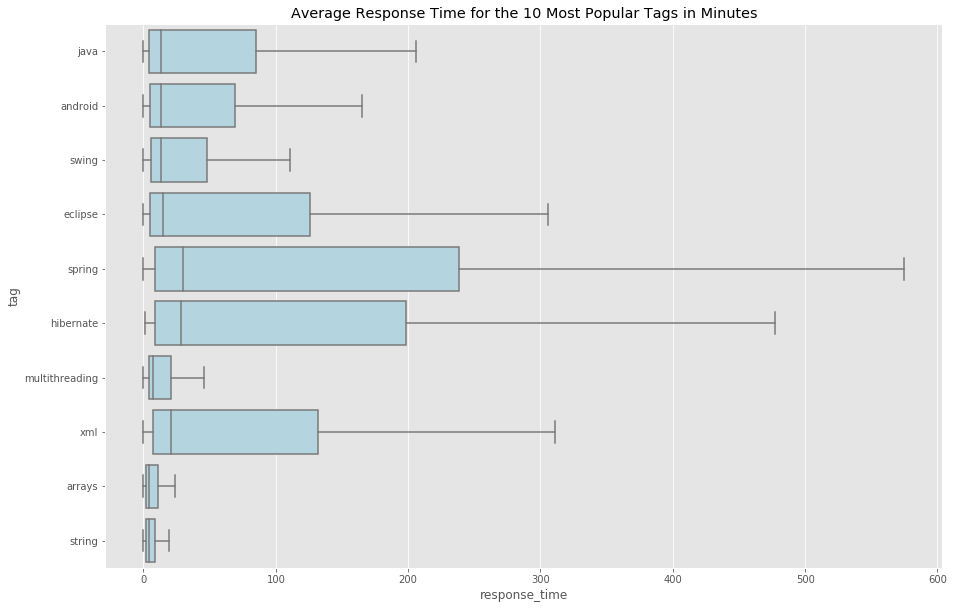

In [55]:
plt.figure(figsize=(15,10))
sns.boxplot(x="response_time", y="tag", data=top_10_tags_df, showfliers=False, palette=['lightblue' for _ in range(len(top_10_tags_df))])
plt.title('Average Response Time for the 10 Most Popular Tags in Minutes')

## How many ”answerers” to ”questioners” are there? 

In [3]:
import time
t1 = time.time()
Posts_clean = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/train_test/Posts_Clean.csv')
t2 = time.time()
print(t2-t1)

47.20956325531006


In [4]:
Posts_clean_question = Posts_clean[Posts_clean.PostTypeId == 1]
Posts_clean_answer = Posts_clean[Posts_clean.PostTypeId == 2]

In [5]:
#Users_questions_counts
Users_questions_counts = Posts_clean_question.OwnerUserId.value_counts()
Users_questions_counts_df = pd.DataFrame(Users_questions_counts)
Users_questions_counts_df['OwnerId'] = Users_questions_counts_df.index
Users_questions_counts_df = Users_questions_counts_df.reset_index()
Users_questions_counts_df = Users_questions_counts_df.drop(columns = ['index'])
Users_questions_counts_df = Users_questions_counts_df.rename(columns={'OwnerUserId': 'que_counts', 'OwnerId': 'OwnerId'})

In [6]:
Users_answers_counts = Posts_clean_answer.OwnerUserId.value_counts()
Users_answers_counts_df = pd.DataFrame(Users_answers_counts)
Users_answers_counts_df['OwnerId'] = Users_answers_counts_df.index
Users_answers_counts_df = Users_answers_counts_df.reset_index()
Users_answers_counts_df = Users_answers_counts_df.drop(columns = ['index'])
Users_answers_counts_df = Users_answers_counts_df.rename(columns={'OwnerUserId': 'ans_counts', 'OwnerId': 'OwnerId'})

In [7]:
que_ans_counts = pd.merge(Users_questions_counts_df, Users_answers_counts_df, on = 'OwnerId')

In [8]:
que_ans_counts['ratio'] = que_ans_counts.que_counts / que_ans_counts.ans_counts

In [11]:
mean = np.mean(que_ans_counts.ratio)
print('The ratio of question to answers is', mean, '.')

The ratio of question to answers is 1.152797225138724 .


## Tag Network Visualization

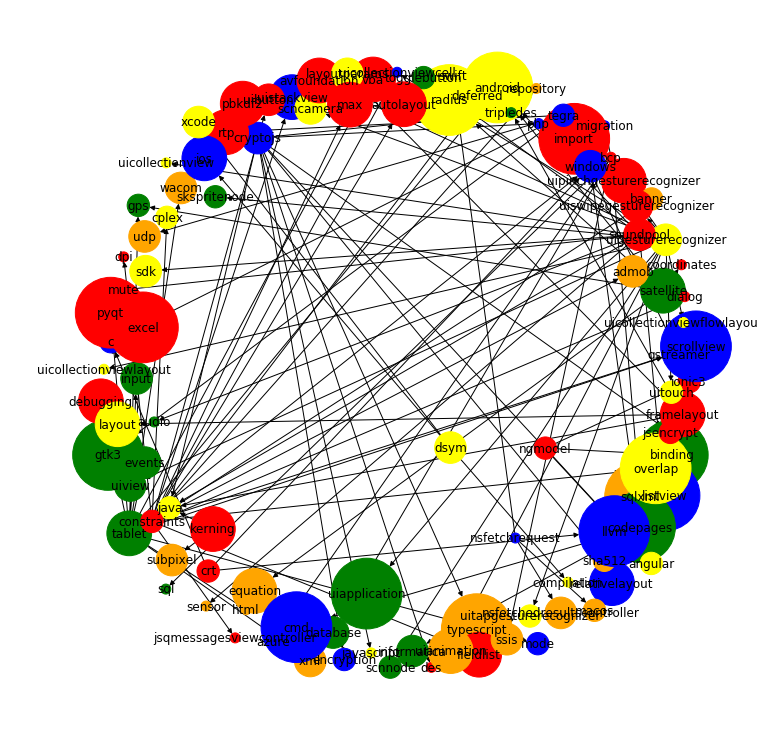

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import json

BASE_PATH = '../../../160-Stackoverflow-Data/tags/'
with open(BASE_PATH + 'tag_network.json') as f:
    json_graph = json.load(f)

graph_limit = 15
subset_json_graph = {key:json_graph[key] for key in list(json_graph.keys())[:graph_limit]}

unique_nodes = set(elm[0] for key, values in subset_json_graph.items() for elm in values['similar_tags'])
unique_nodes = unique_nodes | set(subset_json_graph.keys())

color_options = ['red', 'blue', 'green', 'yellow', 'orange']
size_options = [100, 500, 1000, 2000, 5000]

# we further add attributes to the nodes in the dictionary such as 
    # - alpha
    # - edge_color
    # - style
    # - width
    
nodes = [(node_id, {'color': random.choice(color_options), 'size': random.choice(size_options)}) 
         for node_id in unique_nodes]
weighted_edges = [(key, connection[0], connection[1]) for key, values in subset_json_graph.items()
                  for connection in values['similar_tags']]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(weighted_edges)

# spring_layout (default) treats the nodes as repelling objects and the edges as springs
graph_pos = nx.spring_layout(G)
# graph_pos = nx.shell_layout(G)
# graph_pos = nx.random_layout(G)
# graph_pos = nx.spectral_layout(G)

node_colors = [attributes['color'] for _, attributes in G.nodes(data=True)]
node_sizes = [attributes['size'] for _, attributes in G.nodes(data=True)]

plt.figure(figsize=(10,10))
nx.draw(G, graph_pos, node_color=node_colors, node_size=node_sizes, with_labels=True)
